In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scs
import matplotlib.pyplot as plt

In [28]:
from scipy import stats
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import PowerTransformer

In [7]:
df = pd.read_csv("C:/Users/bonda/OneDrive/Documents/Pacmann.ai/4. Statistics for Business/1. Project 1/Fix Project/data bus sales/BusSalesData.csv")
df.head(5)

,Date,Bus Sales,Time,Temperature,Humidity,Windspeed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Showroom Open
0,02/12/2017,328,0,-1.8,87,1.1,994,-3.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,02/12/2017,308,1,-2.2,86,0.6,990,-4.2,0.0,0.0,0.0,Winter,No Holiday,Yes
2,02/12/2017,262,2,-2.9,86,1.5,1256,-4.9,0.0,0.0,0.0,Winter,No Holiday,Yes
3,02/12/2017,167,3,-3.5,81,2.2,1221,-6.2,0.0,0.0,0.0,Winter,No Holiday,Yes
4,02/12/2017,89,4,-3.8,79,2.0,1167,-6.9,0.0,0.0,0.0,Winter,No Holiday,Yes


In [9]:
time = df['Time'].unique()
holiday = df['Holiday'].unique()
seasons = df['Seasons'].unique()
# show categorical
holiday, seasons, time

(array(['No Holiday', 'Holiday'], dtype=object),
 array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23], dtype=int64))

In [11]:
def hipotesis(column_1, column_2, input_1, input_2, equal):
    """
    Function for hipotesis test (one tail): input column H0 & H1
    (column_1 = categorical, column_2 = numerical)
    and then input categoric values from  column_1
    """
    
    # Categorical 1
    data_group1 = df[df[column_1]==input_1][column_2].values
    # Categorical 2
    data_group2 = df[df[column_1]==input_2][column_2].values
    result = stats.ttest_ind(a = data_group1, 
                         b = data_group2, 
                         equal_var=False, 
                         alternative = equal)
    
    dof = len(data_group1)+len(data_group2)-2
    print(f'DOF Value: {dof}')
    print(f'Statistics Value: {result.statistic}')
    
    # determain term of desicion
    if result.pvalue<0.05:
        print("Reject the null hypothesis")
    else:
        print("Failed to reject the Null hypothesis")
        
    return data_group1, data_group2

In [14]:
# call function for look result hipotesis with Rented Bike Count column
holiday_sales = hipotesis(column_1 = 'Holiday',column_2 = 'Bus Sales',input_1 = 'Holiday',input_2 = 'No Holiday',equal = "greater" )
seasons_sales1 = hipotesis(column_1 = 'Seasons',column_2 = 'Bus Sales',input_1 = 'Winter',input_2 = 'Autumn',equal = "greater" )
seasons_sales2 = hipotesis(column_1 = 'Seasons',column_2 = 'Bus Sales',input_1 = 'Summer',input_2 = 'Spring',equal = "greater" )

print(">>>>>>>>>>>>>>>>>>> SPACE <<<<<<<<<<<<<<<<<<<<<<")

# call function for look result hipotesis with Rainfall(mm) column
holiday_rain = hipotesis(column_1 = 'Holiday',column_2 = 'Rainfall',input_1 = 'Holiday',input_2 = 'No Holiday',equal = "greater" )
seasons_rain1 = hipotesis(column_1 = 'Seasons',column_2 = 'Rainfall',input_1 = 'Winter',input_2 = 'Autumn',equal = "greater" )
season_rain2 = hipotesis(column_1 = 'Seasons',column_2 = 'Rainfall',input_1 = 'Summer',input_2 = 'Spring',equal = "greater" )


# reject H0 : 3 , 5 <> 3

DOF Value: 8734
Statistics Value: -7.628570836325675
Failed to reject the Null hypothesis
DOF Value: 4318
Statistics Value: -41.68474156847654
Failed to reject the Null hypothesis
DOF Value: 4414
Statistics Value: 15.381558903510568
Reject the null hypothesis
>>>>>>>>>>>>>>>>>>> SPACE <<<<<<<<<<<<<<<<<<<<<<
DOF Value: 8734
Statistics Value: -2.3336966531514203
Failed to reject the Null hypothesis
DOF Value: 4318
Statistics Value: -4.024661318903358
Failed to reject the Null hypothesis
DOF Value: 4414
Statistics Value: 1.666478305709935
Reject the null hypothesis


In [23]:
def visualization (dof , statistic):
    """ 
    this function for see hipotesis test, input data
    dof and statistic value from each function hipotesis
    and make alpha is 0.05.
    """
    fig = plt.subplots(figsize=(15, 10)) # make size fig
    
    # plot sample distribution 
    x = np.arange(-4, 14, 0.001)
    plt.plot(x, stats.t.pdf(x, df = dof), 
             color='magenta')

    # plot alpha region
    x_alpha = np.arange(stats.t.ppf(1-0.05, df = dof), 4, 0.01)
    y_alpha = stats.t.pdf(x_alpha, df = dof)
    plt.fill_between(x = x_alpha, 
                     y1 = y_alpha,
                     facecolor = 'red',
                     alpha = 0.05, 
                     label = 'alpha')

    # plot pvalue
    x_pvalue = np.arange(statistic, 4, 0.01)
    y_pvalue = stats.t.pdf(x_pvalue, df = dof)

    plt.fill_between(x = x_pvalue, 
                     y1 = y_pvalue,
                     facecolor = 'green',
                     alpha = 0.05, 
                     label = 'pvalue')

    # plot t-crit and t-stats
    plt.axvline(np.round(statistic, 4), 
                color ="green", 
                linestyle = "--", 
                label ="t-stat")

    t_crit = np.round(stats.t.ppf(1-0.05, df = 8758), 4)
    plt.axvline(t_crit, 
                color ="red", 
                linestyle = "--", 
                label ="t-crit")
    

    plt.legend()
    plt.xlabel("t")
    plt.ylabel("density")


    plt.title(f't Distribution df = {dof} \n\n t-statistic = {np.round(statistic, 4)}',size = 20);

c:\Users\bonda\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:6315: RuntimeWarning: overflow encountered in power
  / (np.sqrt(r*np.pi)*(1+(x**2)/r)**((r+1)/2)))
c:\Users\bonda\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:6315: RuntimeWarning: overflow encountered in multiply
  / (np.sqrt(r*np.pi)*(1+(x**2)/r)**((r+1)/2)))


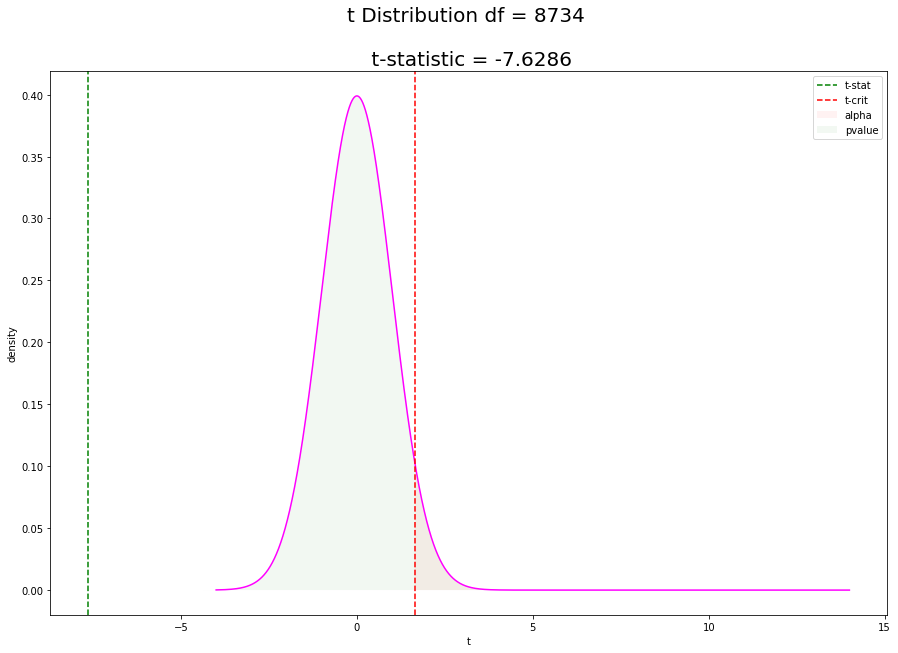

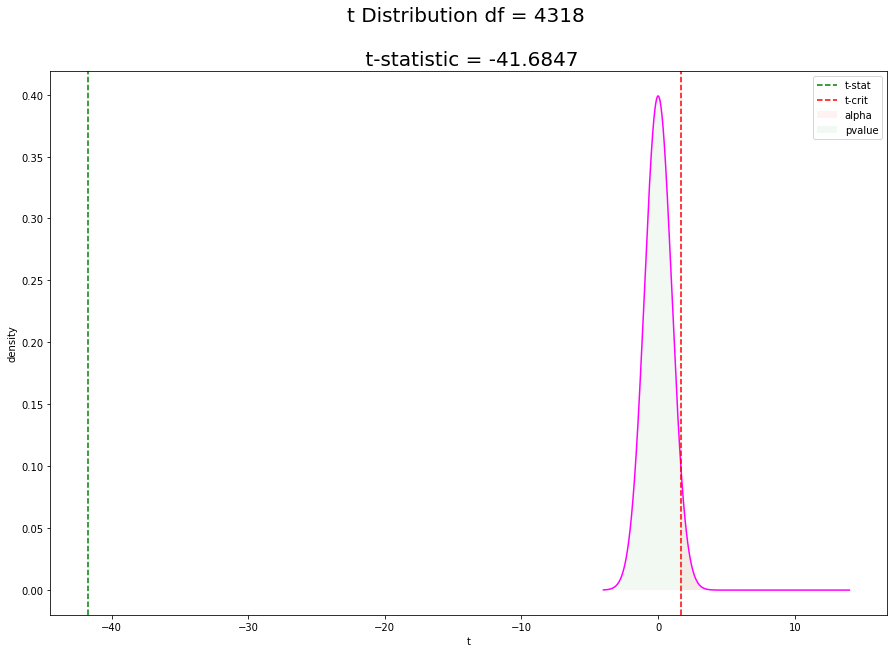

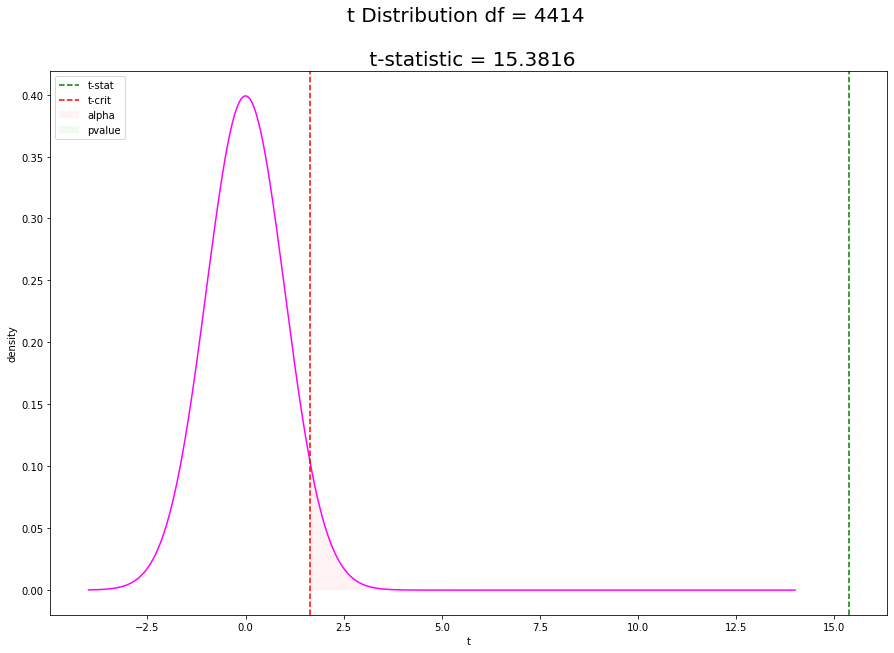

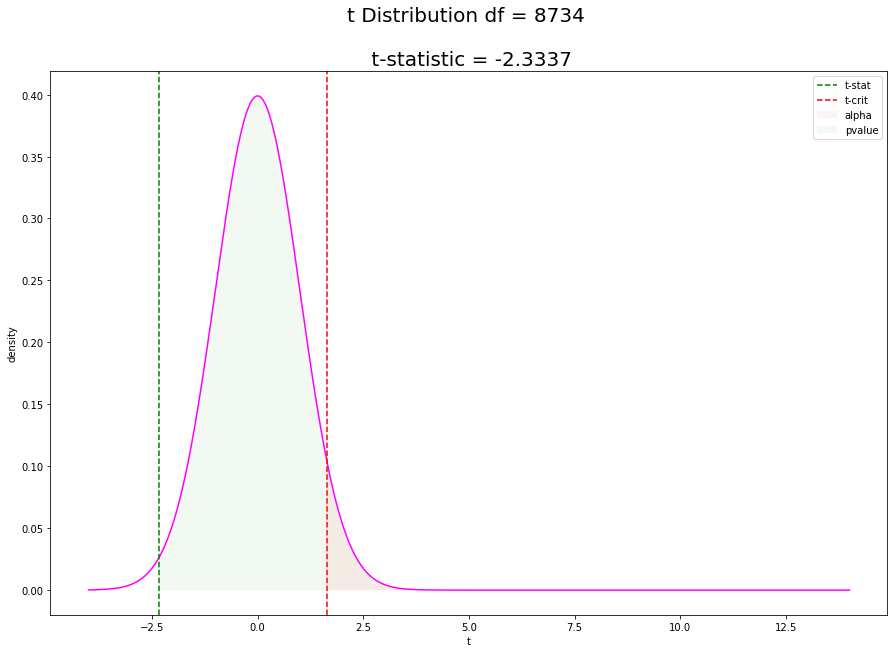

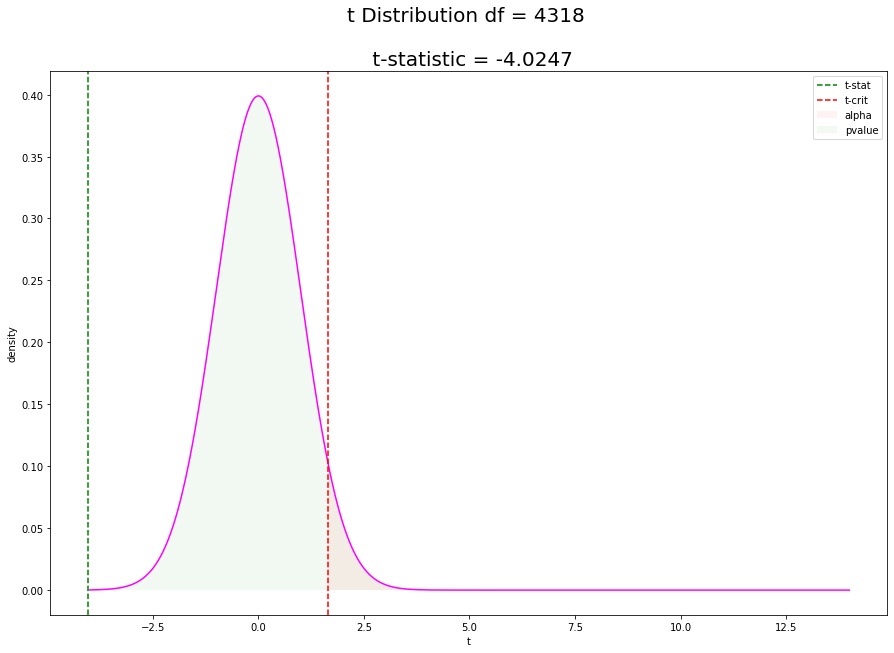

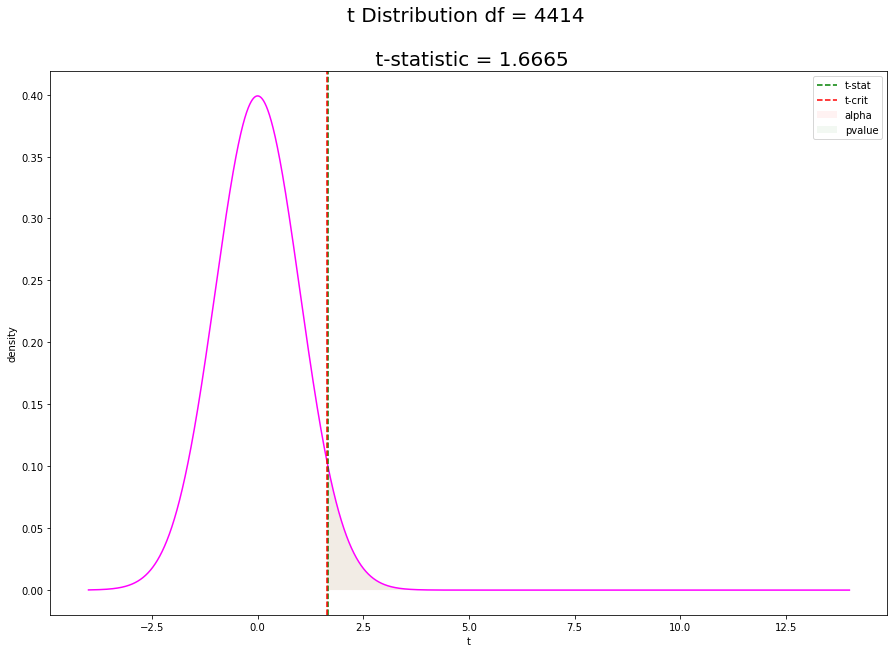

In [24]:
# rent
holiday_rent = visualization(8734,-7.628570836325675)
seasons_rent1 = visualization(4318, -41.68474156847654)
season_rent2 = visualization(4414, 15.381558903510568)


# rain
holiday_rain = visualization(8734 , -2.3336966531514203)
seasons_rain1 = visualization(4318, -4.024661318903358)
season_rain2 = visualization(4414, 1.666478305709935)

In [25]:
def Confidence_Interval(column_1, column_2, input_1, input_2):
    """
    Function for check confident interval
    input two columns and category variable 
    """
    cm = CompareMeans(d1 = DescrStatsW(data=df[df[column_1]==input_1][column_2].values), 
                      d2 = DescrStatsW(data=df[df[column_1]==input_2][column_2].values))

    upper, lower = cm.tconfint_diff(alpha=0.05, 
                                    alternative='two-sided', 
                                    usevar='unequal')

    print("Confidence Interval", ":", "[", abs(lower),",",abs(upper), "]")

In [27]:
# call function for look result hipotesis with Rented Bike Count column
holiday_rent = Confidence_Interval(column_1 = 'Holiday',column_2 = 'Bus Sales',input_1 = 'Holiday',input_2 = 'No Holiday')
seasons_rent1 = Confidence_Interval(column_1 = 'Seasons',column_2 = 'Bus Sales',input_1 = 'Winter',input_2 = 'Autumn')
season_rent2 = Confidence_Interval(column_1 = 'Seasons',column_2 = 'Bus Sales',input_1 = 'Summer',input_2 = 'Spring' )

print(">>>>>>>>>>>>>>>>>>> SPACE <<<<<<<<<<<<<<<<<<<<<<")
# call function for look result hipotesis with Rainfall(mm) column
holiday_rain = Confidence_Interval(column_1 = 'Holiday',column_2 = 'Rainfall',input_1 = 'Holiday',input_2 = 'No Holiday' )
seasons_rain1 = Confidence_Interval(column_1 = 'Seasons',column_2 = 'Rainfall',input_1 = 'Winter',input_2 = 'Autumn' )
season_rain2 = Confidence_Interval(column_1 = 'Seasons',column_2 = 'Rainfall',input_1 = 'Summer',input_2 = 'Spring' )

Confidence Interval : [ 160.65629304250922 , 272.1226889741896 ]
Confidence Interval : [ 567.951754719735 , 624.0251148526403 ]
Confidence Interval : [ 342.7948131563322 , 265.28942597410276 ]
>>>>>>>>>>>>>>>>>>> SPACE <<<<<<<<<<<<<<<<<<<<<<
Confidence Interval : [ 0.011850095691254767 , 0.13771905438367565 ]
Confidence Interval : [ 0.045929754146871934 , 0.1331972985756864 ]
Confidence Interval : [ 0.15367289729463032 , 0.012459129178688272 ]


Based on the result, we can 95% confident that the average difference

## Data Knowledge

In [29]:
# cross validation using statsmodel prepartion
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, cross_validate, KFold

In [35]:
# Split data category
category_column = ['Showroom Open','Time','Seasons', 'Holiday'] # column used
category_column

['Showroom Open', 'Time', 'Seasons', 'Holiday']

In [32]:
# split data category
numeric_col = list(set(df.columns) - set(category_column))

In [33]:
def splitNumCat(data, num_col, cat_col):
    """"
    Function for split category between numeric
    data_num = input data split numeric
    data_cat = input data split category
    """
    data_num = data[num_col]
    data_cat = data[cat_col]

    return data_num, data_cat

In [36]:
# call function X_train
data_num, data_cat = splitNumCat(data = df,
                                       num_col = numeric_col,
                                       cat_col = category_column)

(data_num.shape),(data_cat.shape) 

((8736, 11), (8736, 4))

In [44]:
# Encoder for model
# OHE from data_model
ohe_cat = pd.get_dummies(data_cat)

# concat data 
data_modeling = pd.concat([data_num, ohe_cat],
                           axis = 1)

(data_modeling.shape)

# rename columns
data_modeling.dtypes


Temperature              float64
Solar Radiation          float64
Windspeed                float64
Visibility                 int64
Snowfall                 float64
Bus Sales                  int64
Date                      object
Time                       int64
Rainfall                 float64
Dew point temperature    float64
Humidity                   int64
Time                       int64
Showroom Open_No           uint8
Showroom Open_Yes          uint8
Seasons_Autumn             uint8
Seasons_Spring             uint8
Seasons_Summer             uint8
Seasons_Winter             uint8
Holiday_Holiday            uint8
Holiday_No Holiday         uint8
dtype: object

## Linear Regression

one predictor vs outcome that have high correlation

- Bus Sales vs Temperature

In [38]:
def print_coef_std_err(results):
    """
    Function to combine estimated coefficients and standard error in one DataFrame
    :param results: <statsmodels RegressionResultsWrapper> OLS regression results from 
    :return df: <pandas DataFrame> 
    """
    coef = results.params
    std_err = results.bse
    
    df = pd.DataFrame(data = np.transpose([coef, std_err]), 
                      index = coef.index, 
                      columns=["coef","std err"])
    return df

In [45]:
# rename columns
data_modeling.rename(columns={'Bus Sales' : 'Bus_Sales', 'Dew point temperature' : 'Dew_point_temp'}, inplace=True)
data_modeling.dtypes

Temperature           float64
Solar Radiation       float64
Windspeed             float64
Visibility              int64
Snowfall              float64
Bus_Sales               int64
Date                   object
Time                    int64
Rainfall              float64
Dew_point_temp        float64
Humidity                int64
Time                    int64
Showroom Open_No        uint8
Showroom Open_Yes       uint8
Seasons_Autumn          uint8
Seasons_Spring          uint8
Seasons_Summer          uint8
Seasons_Winter          uint8
Holiday_Holiday         uint8
Holiday_No Holiday      uint8
dtype: object

In [48]:
# Create OLS model object
model = smf.ols("Bus_Sales ~ Temperature", data_modeling)

# Fit the model
results = model.fit()
y_pred_ = results.predict(data_modeling['Temperature'])

# Extract the results (Coefficient and Standard Error) to DataFrame
results_rent = print_coef_std_err(results)

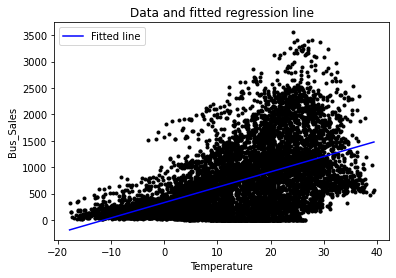

,coef,std err
Intercept,329.013451,8.582023
Temperature,29.124235,0.487876


In [50]:
predictor = "Temperature"
outcome = "Bus_Sales"
data = data_modeling.copy()
results_ = results_rent.copy()

# Plot the data
plt.scatter(data[predictor], data[outcome], color = "k", marker=".")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), len(data))

fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line", color = "b")

# Add a legend and labels
plt.legend()
plt.ylabel("Bus_Sales")
plt.xlabel("Temperature")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()
results_rent


$$\text{Bus Sales}= 329.013451 + 29.124235\text{(Temperature)} $$

- If Temperature is zero then Bus Sales is 329.013451, otherwise follow the value input that given from count temperature

## Uji Asumsi (Single Predictor)

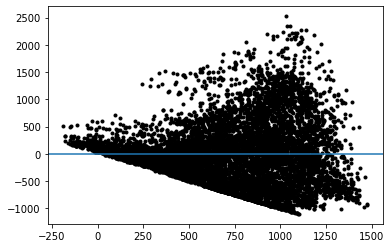

In [52]:
#Visualize the residual plot
plt.scatter(results.fittedvalues, results.resid, marker=".", c = "k")

# Plot the horizontal line in 0 as the fitted line
plt.axhline([0])

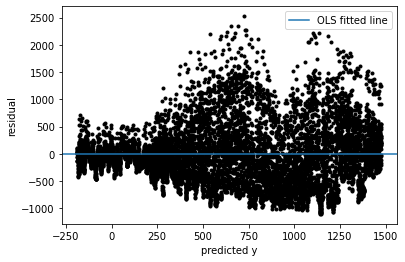

In [53]:
# plot the predicted values, and the residual
plt.scatter(fitted_values, results.resid, 
            marker = ".", 
            color = "k")

# Plot the fitted line as horizontal line at zero
plt.axhline(0, label="OLS fitted line")
plt.ylabel("residual")
plt.xlabel("predicted y")
plt.legend()

In [54]:
# set the weight as 1 over squared (predictor column)
data_linier_single = data_modeling.copy()
weights = 1/(data_linier_single["Temperature"]**2)

In [56]:
data_linier_single["weights"] = weights
data_linier_single.head(5)

,Temperature,Solar Radiation,Windspeed,Visibility,Snowfall,Bus_Sales,Date,Time,Rainfall,Dew_point_temp,...,Time,Showroom Open_No,Showroom Open_Yes,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,weights
0,-1.8,0.0,1.1,994,0.0,328,02/12/2017,0,0.0,-3.6,...,0,0,1,0,0,0,1,0,1,0.308642
1,-2.2,0.0,0.6,990,0.0,308,02/12/2017,1,0.0,-4.2,...,1,0,1,0,0,0,1,0,1,0.206612
2,-2.9,0.0,1.5,1256,0.0,262,02/12/2017,2,0.0,-4.9,...,2,0,1,0,0,0,1,0,1,0.118906
3,-3.5,0.0,2.2,1221,0.0,167,02/12/2017,3,0.0,-6.2,...,3,0,1,0,0,0,1,0,1,0.081633
4,-3.8,0.0,2.0,1167,0.0,89,02/12/2017,4,0.0,-6.9,...,4,0,1,0,0,0,1,0,1,0.069252


In [57]:
# Create WLS (Weighted Least Square) model object and include the weight
model = smf.wls("Bus_Sales ~ Temperature", data_linier_single, weight = weights)

# Fit the model
results2 = model.fit()
y_pred = results2.predict(data_linier_single['Temperature'])

# Extract the results (Coefficient and Standard Error) to DataFrame
results_rent_weighted = print_coef_std_err(results2)

c:\Users\bonda\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['weight']
  warnings.warn(msg, ValueWarning)


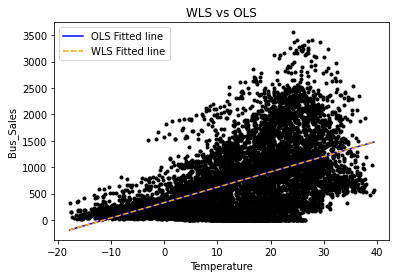

In [58]:
predictor = "Temperature"
outcome = "Bus_Sales"
data = data_linier_single.copy()
results_1 = results_rent.copy()
results_2 = results_rent_weighted.copy()

# Plot the data
plt.scatter(data[predictor], data[outcome], color = "k", marker=".")

# Calculate the fitted values
a_hat1 = results_1.loc["Intercept"]["coef"]
b_hat1 = results_1.loc[predictor]["coef"]

# Calculate the fitted values
a_hat2 = results_2.loc["Intercept"]["coef"]
b_hat2 = results_2.loc[predictor]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), len(data))

fitted_values1 = a_hat1 + b_hat1 * x_domain
fitted_values2 = a_hat2 + b_hat2 * x_domain


# Plot the fitted line
plt.plot(x_domain, fitted_values1, label="OLS Fitted line", color = "b")

# Plot the fitted line
plt.plot(x_domain, fitted_values2, label="WLS Fitted line", color = "orange", linestyle = "--")

# Add a legend and labels
plt.legend()
plt.ylabel("Bus_Sales")
plt.xlabel("Temperature")

# Add a title and adjust the margins
plt.title("WLS vs OLS")

# Show the plot
plt.show()

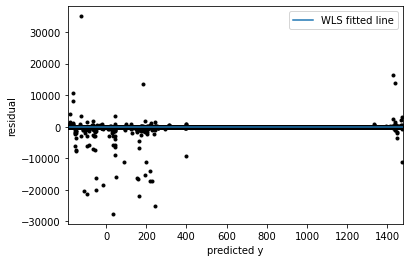

In [59]:
# plot the predicted values, and the residual
plt.scatter(fitted_values2, results2.resid * weights, 
            marker = ".", 
            color = "k")

# Plot the fitted line as horizontal line at zero
plt.axhline(0, label="WLS fitted line")

plt.xlim(min(fitted_values2), max(fitted_values2))
plt.ylabel("residual")
plt.xlabel("predicted y")
plt.legend()
plt.show()

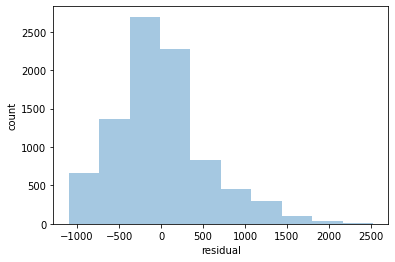

In [60]:
# check normaly error
plt.hist(results2.resid, color='tab:blue', alpha=0.4)
plt.xlabel("residual")
plt.ylabel("count")
plt.show()

### Evaluation Model

In [64]:
# check rsquared with weight
results2.rsquared


0.2897809372795347

In [65]:
# check rsme with weight
rsme = mean_squared_error(data_linier_single['Bus_Sales'], y_pred, squared=False)
rsme

544.0362451285813

Result:

- Rsquared from 1 column predictor is very low : 0.289
- Rsme from 1 column predictor is very high : 544.03

## Model Multiple Linear Regression

In [119]:
# Create OLS model object
model = smf.ols("Bus_Sales ~ Temperature + Seasons_Autumn + Seasons_Spring + Seasons_Summer + Seasons_Winter", data_modeling)

# Fit the model
result_1 = model.fit()
y_pred_ = results2.predict(data_modeling[["Temperature", "Seasons_Autumn", "Seasons_Spring", "Seasons_Summer", "Seasons_Winter"]])

# Extract the results (Coefficient and Standard Error) to DataFrame
results_ = print_coef_std_err(result_1)

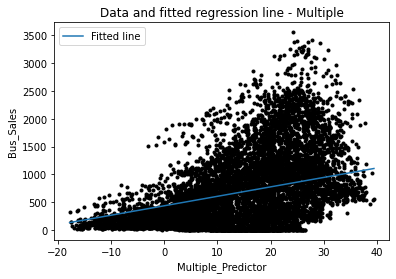

,coef,std err
Intercept,236.254662,10.866713
Temperature,31.753061,0.959820
Seasons_Autumn,134.963637,10.758317
Seasons_Spring,79.504119,10.404470
Seasons_Summer,-46.266248,18.628109
Seasons_Winter,68.053153,15.944567


In [120]:
predictors = ["Temperature", "Seasons_Autumn", "Seasons_Spring", "Seasons_Summer", "Seasons_Winter"]
outcome = "Bus_Sales"
data = data_modeling.copy()
results_ = results_.copy()
# linestyles = {0 : "--", 1: "-"}
# c = {0 : "b", 1: "g"}
# markers = {0 : "x", 1: "."}

# Plot the data
plt.scatter(data[predictors[0]], data[outcome], color = "k", marker=".")


# x value predictors value
x_domain = np.linspace(np.min(data[predictors[0]]), np.max(data[predictors[0]]), len(data))

# Calculate the fitted values for two lines regarding the mom_hs (0 and 1)
beta0_hat = results_.loc["Intercept"]["coef"]
beta1_hat = results_.loc[predictors[0]]["coef"]
beta2_hat = results_.loc[predictors[1]]["coef"]
beta3_hat = results_.loc[predictors[2]]["coef"]
beta4_hat = results_.loc[predictors[3]]["coef"]
beta5_hat = results_.loc[predictors[4]]["coef"]

fitted_values_multiple = beta0_hat +  beta1_hat + beta2_hat + beta3_hat + beta4_hat + beta5_hat * x_domain * data[predictors[1]].mean()

# Plot two fitted line
plt.plot(x_domain, fitted_values_multiple, label = f"Fitted line")

# Add a legend and labels
plt.legend()
plt.ylabel(f"Bus_Sales")
plt.xlabel(f"Multiple_Predictor")

# Add a title and adjust the margins
plt.title("Data and fitted regression line - Multiple")

# Show the plot
plt.show()
results_

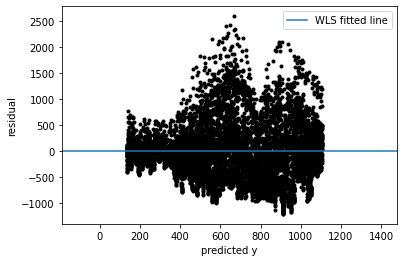

In [68]:
# plot the predicted values, and the residual
plt.scatter(fitted_values_multiple, result_1.resid, 
            marker = ".", 
            color = "k")

# Plot the fitted line as horizontal line at zero
plt.axhline(0, label="WLS fitted line")

plt.xlim(min(fitted_values2), max(fitted_values2))
plt.ylabel("residual")
plt.xlabel("predicted y")
plt.legend()
plt.show()

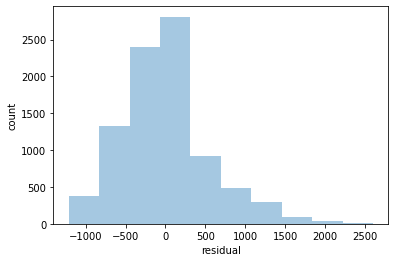

In [69]:
# check normaly error
plt.hist(result_1.resid, color='tab:blue', alpha=0.4)
plt.xlabel("residual")
plt.ylabel("count")

plt.show()

In [70]:
# check Rsquare
result_1.rsquared

0.2979051377174423

In [124]:
# check rsme 
rsme = mean_squared_error(data_modeling['Bus_Sales'], y_pred_, squared=False)
rsme

544.0362451285813

In [123]:
data_modeling

,Temperature,Solar Radiation,Windspeed,Visibility,Snowfall,Bus_Sales,Date,Time,Rainfall,Dew_point_temp,Humidity,Time,Showroom Open_No,Showroom Open_Yes,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday
0,-1.8,0.0,1.1,994,0.0,328,02/12/2017,0,0.0,-3.6,87,0,0,1,0,0,0,1,0,1
1,-2.2,0.0,0.6,990,0.0,308,02/12/2017,1,0.0,-4.2,86,1,0,1,0,0,0,1,0,1
2,-2.9,0.0,1.5,1256,0.0,262,02/12/2017,2,0.0,-4.9,86,2,0,1,0,0,0,1,0,1
3,-3.5,0.0,2.2,1221,0.0,167,02/12/2017,3,0.0,-6.2,81,3,0,1,0,0,0,1,0,1
4,-3.8,0.0,2.0,1167,0.0,89,02/12/2017,4,0.0,-6.9,79,4,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8731,4.2,0.0,2.6,1894,0.0,1003,30/11/2018,19,0.0,-10.3,34,19,0,1,1,0,0,0,0,1
8732,3.4,0.0,2.3,2000,0.0,764,30/11/2018,20,0.0,-9.9,37,20,0,1,1,0,0,0,0,1
8733,2.6,0.0,0.3,1968,0.0,694,30/11/2018,21,0.0,-9.9,39,21,0,1,1,0,0,0,0,1
8734,2.1,0.0,1.0,1859,0.0,712,30/11/2018,22,0.0,-9.8,41,22,0,1,1,0,0,0,0,1


# Transformation

In [72]:
def normalizer(data):
    """
    This function used for convert data to
    Normal scaler
    """
    # make scaler
    normal = Normalizer()

    # normalize the data (fit)
    normalized_data = normal.fit_transform(data)
    normalized_data = pd.DataFrame(normalized_data,
                           index = data.index,
                           columns = data.columns)

    return normalized_data, normal

### Single Predictor Model

In [74]:
# call function transform 
data_normalizer, scaler = normalizer(data = data_modeling[['Temperature','Bus_Sales']])

In [75]:
# Create OLS model object
model = smf.ols("Bus_Sales ~ Temperature", data_normalizer)

# Fit the model
results_normalize = model.fit()
y_pred_normalize = results_normalize.predict(data_normalizer['Temperature'])

# Extract the results (Coefficient and Standard Error) to DataFrame
results_rent_normal = print_coef_std_err(results_normalize)

In [76]:
results_rent_normal

,coef,std err
Intercept,1.011732,0.000803
Temperature,-0.825596,0.003720


### Uji Assumtion - Model results_normalize (Single Predictor) 

In [ ]:
#Visualize the residual plot
plt.scatter(result_norm.fittedvalues, results_normalize.resid, marker=".", c = "k")

# Plot the horizontal line in 0 as the fitted line
plt.axhline([0])

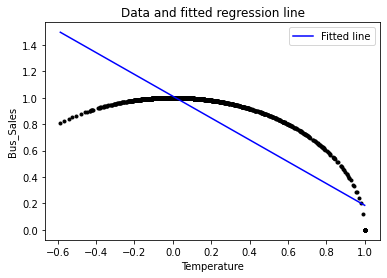

In [77]:
predictor = "Temperature"
outcome = "Bus_Sales"
data = data_normalizer.copy()
results_ = results_rent_normal.copy()

# Plot the data
plt.scatter(data[predictor], data[outcome], color = "k", marker=".")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), len(data))

fitted_values_trans = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values_trans, label="Fitted line", color = "b")

# Add a legend and labels
plt.legend()
plt.ylabel("Bus_Sales")
plt.xlabel("Temperature")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

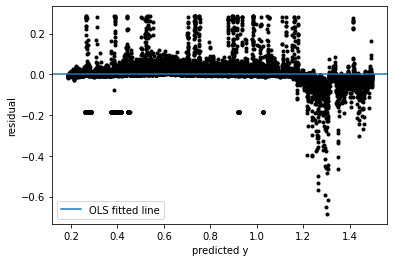

In [78]:
# plot the predicted values, and the residual
plt.scatter(fitted_values_trans, results_normalize.resid, 
            marker = ".", 
            color = "k")

# Plot the fitted line as horizontal line at zero
plt.axhline(0, label="OLS fitted line")
plt.ylabel("residual")
plt.xlabel("predicted y")
plt.legend()

In [ ]:
# check normaly error
plt.hist(results_normalize.resid, color='tab:blue', alpha=0.4)
plt.xlabel("residual")
plt.ylabel("count")

plt.show()

In [ ]:
# check Rsquare with 
results_normalize.rsquared

In [79]:
# check rsme 
rsme_ = mean_squared_error(data_normalizer['Bus_Sales'], y_pred_normalize, squared=False)
rsme_

0.07167889058755095

### Multiple Predictor Model 

In [80]:
season_col = data_modeling [["Seasons_Autumn", "Seasons_Spring", "Seasons_Summer", "Seasons_Winter"]]

In [81]:
# concat with data transform
data_multiple_con = pd.concat([data_normalizer, season_col],
                           axis = 1)

(data_multiple_con.shape)

(8736, 6)

In [82]:
# Create OLS model object
model = smf.ols("Bus_Sales ~ Temperature + Seasons_Autumn + Seasons_Spring + Seasons_Summer + Seasons_Winter", data_multiple_con)

# Fit the model
result_norm = model.fit()
y_pred_norm = result_norm.predict(data_multiple_con[["Temperature", "Seasons_Autumn", "Seasons_Spring", "Seasons_Summer", "Seasons_Winter"]])

# Extract the results (Coefficient and Standard Error) to DataFrame
results_norm_ = print_coef_std_err(result_norm)

In [83]:
results_norm_

,coef,std err
Intercept,-2.559265e+10,1.634878e+11
Temperature,-8.440296e-01,3.616845e-03
Seasons_Autumn,2.559265e+10,1.634878e+11
Seasons_Spring,2.559265e+10,1.634878e+11
Seasons_Summer,2.559265e+10,1.634878e+11
Seasons_Winter,2.559265e+10,1.634878e+11


### Model results_norm (Multiple Predictor)

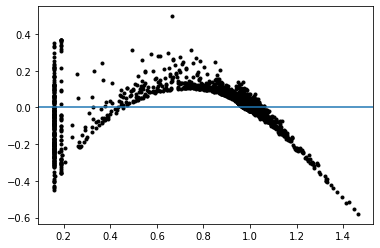

In [97]:
#Visualize the residual plot
plt.scatter(result_norm.fittedvalues, result_norm_2.resid, marker=".", c = "k")

# Plot the horizontal line in 0 as the fitted line
plt.axhline([0])

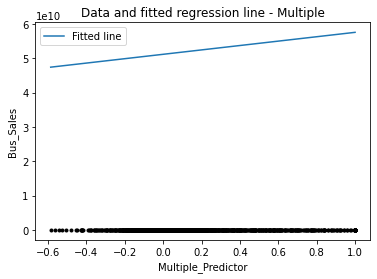

In [98]:
predictors = ["Temperature", "Seasons_Autumn", "Seasons_Spring", "Seasons_Summer", "Seasons_Winter"]
outcome = "Bus_Sales"
data = data_multiple_con.copy()
results_ = results_norm_.copy()
# linestyles = {0 : "--", 1: "-"}
# c = {0 : "b", 1: "g"}
# markers = {0 : "x", 1: "."}

# Plot the data
plt.scatter(data[predictors[0]], data[outcome], color = "k", marker=".")


# x value predictors value
x_domain = np.linspace(np.min(data[predictors[0]]), np.max(data[predictors[0]]), len(data))

# Calculate the fitted values for two lines regarding the mom_hs (0 and 1)
beta0_hat = results_.loc["Intercept"]["coef"]
beta1_hat = results_.loc[predictors[0]]["coef"]
beta2_hat = results_.loc[predictors[1]]["coef"]
beta3_hat = results_.loc[predictors[2]]["coef"]
beta4_hat = results_.loc[predictors[3]]["coef"]
beta5_hat = results_.loc[predictors[4]]["coef"]

fitted_values_multiple = beta0_hat +  beta1_hat + beta2_hat + beta3_hat + beta4_hat + beta5_hat * x_domain * data[predictors[1]].mean()

# Plot two fitted line
plt.plot(x_domain, fitted_values_multiple, label = f"Fitted line")

# Add a legend and labels
plt.legend()
plt.ylabel(f"Bus_Sales")
plt.xlabel(f"Multiple_Predictor")

# Add a title and adjust the margins
plt.title("Data and fitted regression line - Multiple")

# Show the plot
plt.show()

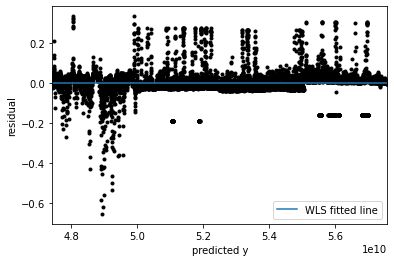

In [99]:
# plot the predicted values, and the residual
plt.scatter(fitted_values_multiple, result_norm.resid, 
            marker = ".", 
            color = "k")

# Plot the fitted line as horizontal line at zero
plt.axhline(0, label="WLS fitted line")

plt.xlim(min(fitted_values_multiple), max(fitted_values_multiple))
plt.ylabel("residual")
plt.xlabel("predicted y")
plt.legend()
plt.show()

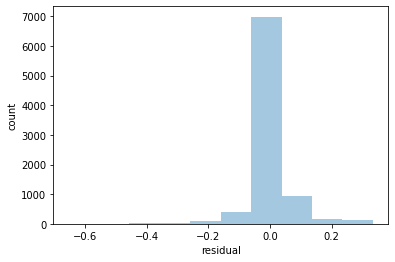

In [87]:
# check normaly error
plt.hist(result_norm.resid, color='tab:blue', alpha=0.4)
plt.xlabel("residual")
plt.ylabel("count")

plt.show()

In [88]:
# check Rsquare with 
result_norm.rsquared

0.8703732136162827

In [90]:
# check rsme 
rsme_ = mean_squared_error(data_multiple_con['Bus_Sales'], y_pred_norm, squared=False)
rsme_

0.06649440373720915

### Multiple Columns_2 Model

We want add columnt Dew_point_temp because have high correlation with Temperature as big as 0.91

In [91]:
# call function transform 
data_normalizer_2, scaler = normalizer(data = data_modeling[['Temperature','Bus_Sales','Dew_point_temp']])

In [92]:
# concat with data transform
data_multiple_con2 = pd.concat([data_normalizer_2, season_col],
                           axis = 1)

(data_multiple_con2.shape)

(8736, 7)

In [93]:
data_multiple_con2

,Temperature,Bus_Sales,Dew_point_temp,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,-0.005487,0.999925,-0.010975,0,0,0,1
1,-0.007142,0.999882,-0.013635,0,0,0,1
2,-0.011066,0.999764,-0.018698,0,0,0,1
3,-0.020939,0.999092,-0.037092,0,0,0,1
4,-0.042530,0.996106,-0.077226,0,0,0,1
...,...,...,...,...,...,...,...
8731,0.004187,0.999939,-0.010269,1,0,0,0
8732,0.004450,0.999906,-0.012957,1,0,0,0
8733,0.003746,0.999891,-0.014264,1,0,0,0
8734,0.002949,0.999901,-0.013763,1,0,0,0


In [96]:
# Create OLS model object
model = smf.ols("Bus_Sales ~ Temperature + Seasons_Autumn + Seasons_Spring + Seasons_Summer + Seasons_Winter + Dew_point_temp", data_multiple_con2)

# Fit the model
result_norm_2 = model.fit()
y_pred_norm_2 = result_norm_2.predict(data_multiple_con2[["Temperature", "Seasons_Autumn", "Seasons_Spring", "Seasons_Summer", "Seasons_Winter", "Dew_point_temp"]])

# Extract the results (Coefficient and Standard Error) to DataFrame
results_norm_2 = print_coef_std_err(result_norm_2)
results_norm_2

,coef,std err
Intercept,3.349219e+08,8.797640e+10
Temperature,-1.296715e+00,6.500165e-03
Seasons_Autumn,-3.349219e+08,8.797640e+10
Seasons_Spring,-3.349219e+08,8.797640e+10
Seasons_Summer,-3.349219e+08,8.797640e+10
Seasons_Winter,-3.349219e+08,8.797640e+10
Dew_point_temp,5.394041e-01,9.120953e-03


### Model results_norm_2 (Multiple Predictor)

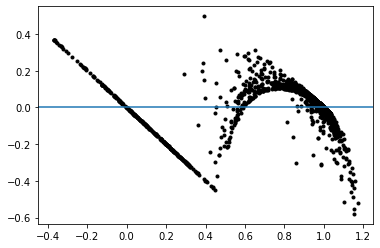

In [100]:
#Visualize the residual plot
plt.scatter(result_norm_2.fittedvalues, result_norm_2.resid, marker=".", c = "k")

# Plot the horizontal line in 0 as the fitted line
plt.axhline([0])

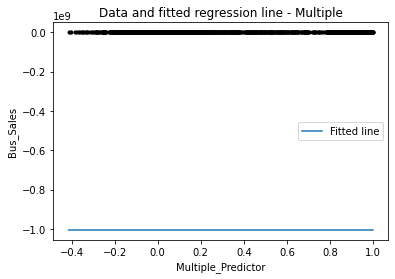

In [104]:
predictors = ["Temperature", "Seasons_Autumn", "Seasons_Spring", "Seasons_Summer", "Seasons_Winter", "Dew_point_temp"]
outcome = "Bus_Sales"
data = data_multiple_con2.copy()
results_ = results_norm_2.copy()
# linestyles = {0 : "--", 1: "-"}
# c = {0 : "b", 1: "g"}
# markers = {0 : "x", 1: "."}

# Plot the data
plt.scatter(data[predictors[0]], data[outcome], color = "k", marker=".")


# x value predictors value
x_domain = np.linspace(np.min(data[predictors[0]]), np.max(data[predictors[0]]), len(data))

# Calculate the fitted values for two lines regarding the mom_hs (0 and 1)
beta0_hat = results_.loc["Intercept"]["coef"]
beta1_hat = results_.loc[predictors[0]]["coef"]
beta2_hat = results_.loc[predictors[1]]["coef"]
beta3_hat = results_.loc[predictors[2]]["coef"]
beta4_hat = results_.loc[predictors[3]]["coef"]
beta5_hat = results_.loc[predictors[4]]["coef"]
beta6_hat = results_.loc[predictors[5]]["coef"]

fitted_values_multiple_ = beta0_hat +  beta1_hat + beta2_hat + beta3_hat + beta4_hat + beta5_hat + beta6_hat * x_domain * data[predictors[1]].mean()

# Plot two fitted line
plt.plot(x_domain, fitted_values_multiple_, label = f"Fitted line")

# Add a legend and labels
plt.legend()
plt.ylabel(f"Bus_Sales")
plt.xlabel(f"Multiple_Predictor")

# Add a title and adjust the margins
plt.title("Data and fitted regression line - Multiple")

# Show the plot
plt.show()

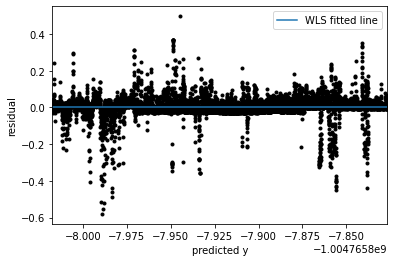

In [102]:
# plot the predicted values, and the residual
plt.scatter(fitted_values_multiple_, result_norm_2.resid, 
            marker = ".", 
            color = "k")

# Plot the fitted line as horizontal line at zero
plt.axhline(0, label="WLS fitted line")

plt.xlim(min(fitted_values_multiple_), max(fitted_values_multiple_))
plt.ylabel("residual")
plt.xlabel("predicted y")
plt.legend()
plt.show()

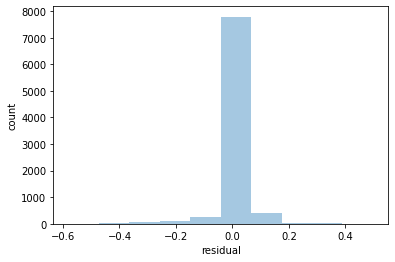

In [103]:
# check normaly error
plt.hist(result_norm_2.resid, color='tab:blue', alpha=0.4)
plt.xlabel("residual")
plt.ylabel("count")

plt.show()

In [105]:
# check Rsquare with 
result_norm_2.rsquared

0.9027037384803013

In [107]:
# check rsme 
rsme_ = mean_squared_error(data_multiple_con2['Bus_Sales'], y_pred_norm_2, squared=False)
rsme_

0.05864190671990088

### Cross Validation

In [108]:
class StatsmodelsRegressor(BaseEstimator, RegressorMixin):
    """ A universal sklearn-style wrapper for statsmodels regressors """
    
    def __init__(self, sm_class, sm_formula):
        self.sm_class = sm_class
        self.sm_formula = sm_formula
        self.model = None
        self.result = None
 
    def fit(self, data, dummy):
        self.model = self.sm_class(self.sm_formula, data)
        self.result = self.model.fit()
 
    def predict(self,X):
        return self.result.predict(X)

### Single Column Model 

In [109]:
# call function bestestimator
regress_single =StatsmodelsRegressor(smf.ols, "Bus_Sales ~ Temperature")

In [110]:
# Create k-fold splitter object
kfold = KFold(n_splits=10, shuffle = True, random_state=123)

In [112]:
# crossvalidation single column
scores_ols_single = cross_val_score(estimator = regress_single,
                                    X = data_normalizer,
                                    y = data_normalizer["Bus_Sales"],
                                    cv = kfold,
                                    scoring = "r2")
scores_ols_single = pd.DataFrame(data = scores_ols_single, columns=["test_rsquared"])
scores_ols_single["folds"] = [f"Folds {i+1}" for i in range(10)]
scores_ols_single["test_rsquared"].mean()

0.84593442297649

### Multiple Column Model

In [113]:
# call function bestestimator
regress_multiple =StatsmodelsRegressor(smf.ols, "Bus_Sales ~ Temperature + Seasons_Autumn + Seasons_Spring + Seasons_Summer + Seasons_Winter")

In [114]:
# crossvalidation multiple column
scores_ols_single = cross_val_score(estimator = regress_multiple,
                                    X = data_multiple_con,
                                    y = data_multiple_con["Bus_Sales"],
                                    cv = kfold,
                                    scoring = "r2")
scores_ols_single = pd.DataFrame(data = scores_ols_single, columns=["test_rsquared"])
scores_ols_single["folds"] = [f"Folds {i+1}" for i in range(10)]
scores_ols_single["test_rsquared"].mean()

0.8671963018544122

In [115]:
# call function bestestimator add column Dew_point_temp
regress_multiple2 =StatsmodelsRegressor(smf.ols, "Bus_Sales ~ Temperature + Seasons_Autumn + Seasons_Spring + Seasons_Summer + Seasons_Winter + Dew_point_temp")

In [116]:
# crossvalidation multiple column and add column Dew_point_temp
scores_ols_single = cross_val_score(estimator = regress_multiple2,
                                    X = data_multiple_con2,
                                    y = data_multiple_con2["Bus_Sales"],
                                    cv = kfold,
                                    scoring = "r2")
scores_ols_single = pd.DataFrame(data = scores_ols_single, columns=["test_rsquared"])
scores_ols_single["folds"] = [f"Folds {i+1}" for i in range(10)]
scores_ols_single["test_rsquared"].mean()

0.9008455241510139